In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
sizes = np.load("../results/eurosat_size_vs_performance_sizes.npy")

In [4]:
model_names = [
    "resnet50_pretrained_moco",
    "resnet50_pretrained_imagenet",
    "resnet50_randominit",
    "resnet18_pretrained_moco",
]
rgbs = [True, False]

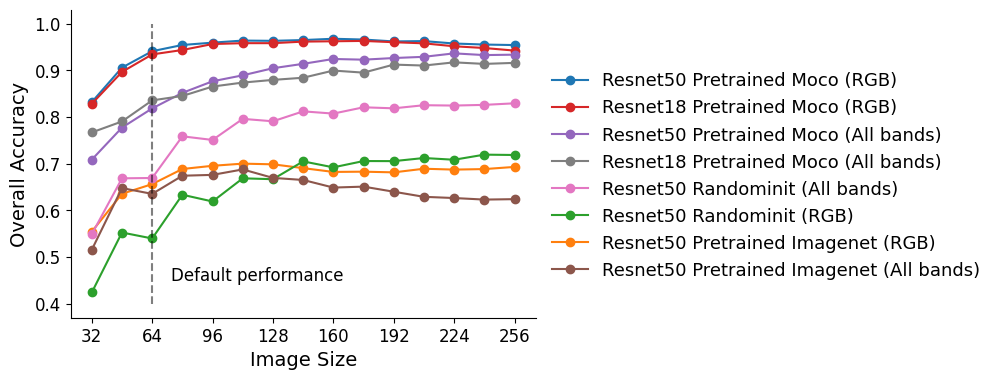

In [27]:
plt.figure(figsize=(6, 4))


data_list = []
for rgb in [True, False]:
    for model_name in model_names:
        data = np.load(f"../results/eurosat_size_vs_performance-{model_name}-{rgb}.npy")
        name = model_name.replace("_", " ").title()
        if rgb:
            name += " (RGB)"
        else:
            name += " (All bands)"
        plt.plot(sizes, data, marker="o", label=name)
        data_list.append(data)

# add default performance line
plt.vlines(64, 0.4, 1.0, linestyle="--", color="black", alpha=0.5)
plt.annotate(f"Default performance", (64, 0.5), xytext=(64 + 10, 0.45), fontsize=12)

# remove right and top spines
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# xticks multiples of 32
plt.xticks(np.arange(32, 256 + 1, 32), fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Overall Accuracy", fontsize=14)
plt.xlabel("Image Size", fontsize=14)

# add legend off right side
# sort legend by order of performance
handles, labels = ax.get_legend_handles_labels()
order = np.argsort([data[-1] for data in data_list])[::-1]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
plt.legend(
    handles,
    labels,
    bbox_to_anchor=(1.0, 0.85),
    loc="upper left",
    fontsize=13,
    frameon=False,
)

plt.show()
plt.close()